<a href="https://colab.research.google.com/github/emadaghajanzadeh/Movie-Genre-Prediction/blob/main/EmadAghajanzadeh_9712762294.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries


In [ ]:
!nvidia-smi

Mon Jul  5 20:23:54 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import numpy as np
from keras.datasets import imdb
from matplotlib import pyplot as plt
import pandas as pd
import json
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import nltk
import seaborn as sns
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import pprint

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#Data Loading

In [ ]:
#Train
df = pd.read_csv("train.csv",  encoding = "ISO-8859-1")
df = df.dropna(axis=1,how='all')
df = df.dropna()
print(df)
#Test
df_test = pd.read_csv("test.csv",  encoding = "ISO-8859-1")
df_test = df_test.dropna(axis=1,how='all')
df_test = df_test.dropna()
df_test

        id  ...                                           overview
0        1  ...  When Lou, who has become the "father of the In...
1        2  ...  Mia Thermopolis is now a college graduate and ...
2        3  ...  Under the direction of a ruthless instructor, ...
3        4  ...  Vidya Bagchi (Vidya Balan) arrives in Kolkata ...
4        5  ...  Marine Boy is the story of a former national s...
...    ...  ...                                                ...
1995  1996  ...  A desk-bound CIA analyst volunteers to go unde...
1996  1997  ...  An American Ambassador is killed during an att...
1997  1998  ...  A young advertising executive's life becomes i...
1998  1999  ...  A revenge-seeking gold digger marries a womani...
1999  2000  ...  A man struggles with memories of his past, inc...

[1995 rows x 3 columns]


,id,genres,overview
0,2001,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",1951: Andy Schmidt is in his last year of coll...
1,2002,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","Kickboxer 2 is, well, an unnecessary sequel wh..."
2,2003,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",A college-age brother and sister get more than...
3,2004,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...","Having just returned from a mission to Mars, C..."
4,2005,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...","Washington, D.C. psychologist Carol Bennell an..."
...,...,...,...
995,2996,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",Military men Rock Reilly and Eddie Devane are ...
996,2997,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",Three girls in 1980s Stockholm decide to form ...
997,2998,"[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...","Samantha Caine, suburban homemaker, is the ide..."
998,2999,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",Reuben Feffer is a guy who's spent his entire ...


In [ ]:
import re
labels = {}
names = {}
#Train
for index, row in df.iterrows():
    labels[index] = []
    names[index] = []
    m = re.findall(r'\b\d+\b', row[1], re.M)
    for label in m:
      labels[index].append(int(label))
    strings = (re.split(r'\W+', row[1]))
    for name in strings:
      if name == "Science":
          names[index].append(name+ " Fiction")
      elif len(name)>0 and name[0].isupper() and name!= "Fiction":
          names[index].append(name)
    # print("-----------") 
    # if index==14:
    #   print(row[1])
    #   print(row[0])
      
print(labels)
print(names)

#Test
labels_test = {}
names_test = {}
for index, row in df_test.iterrows():
    labels_test[index] = []
    names_test[index] = []
    m = re.findall(r'\b\d+\b', row[1], re.M)
    for label in m:
      labels_test[index].append(int(label))
    strings = (re.split(r'\W+', row[1]))
    for name in strings:
      if name == "Science":
          names_test[index].append(name+ " Fiction")
      elif len(name)>0 and name[0].isupper() and name!= "Fiction":
          names_test[index].append(name)
    # print("-----------") 
print(labels_test)
print(names_test)

{0: [35], 1: [35, 18, 10751, 10749], 2: [18], 3: [53, 18], 4: [28, 53], 5: [16, 12, 10751], 6: [27, 53], 7: [99], 8: [28, 35, 10402, 10751, 12], 9: [35, 10402], 10: [18], 11: [35], 12: [18], 13: [35, 80], 14: [28, 53, 878, 9648], 15: [28, 80, 18], 16: [27, 53], 17: [18, 10749], 18: [35, 10749], 19: [28, 53, 80], 20: [12, 10751, 878], 21: [27, 53], 22: [53, 27], 23: [53, 9648, 10769], 24: [27, 35], 25: [35, 27, 9648, 53], 26: [80, 18, 9648, 53], 27: [18, 35, 10749], 28: [16], 29: [28, 12, 80, 53], 30: [18, 35], 31: [9648, 18, 53], 32: [14, 28, 12], 33: [27], 34: [28, 35, 80, 53], 35: [28, 80, 53], 36: [35, 10749], 37: [28, 18, 878, 53], 38: [53], 39: [10752, 37], 40: [28, 99], 41: [80, 18], 42: [35], 43: [18], 44: [35, 10749], 45: [80, 18, 9648, 10749, 53], 46: [16, 10751, 35, 12], 47: [80, 18, 9648, 37], 48: [18, 35], 49: [878, 28, 12, 53], 50: [10749, 18, 35], 51: [12, 35], 52: [12, 10751], 53: [18, 10751, 10749], 54: [28], 55: [35, 18, 10749], 56: [35, 18], 57: [28, 80, 14], 58: [104

In [ ]:
def preprocess_text(sen):
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [ ]:
# df.loc[390,"overview"]
# df = df.dropna()

In [ ]:
X = []
X_test = []
sentences = list(df["overview"])
for index,sen in enumerate(sentences):
    print(index)
    print(sen)
    print("------------")
    X.append(preprocess_text(sen))

sentences = list(df_test["overview"])
for index,sen in enumerate(sentences):
    print(index)
    print(sen)
    print("------------")
    X_test.append(preprocess_text(sen))

print(len(X))
print(len(X_test))

Streaming output truncated to the last 5000 lines.
1326
Bored with the limited and tedious nature of provincial life in 19th-century France, the fierce and sensual Emma Bovary finds herself in calamitous debt and purses scandalous sexual liaisons with absolute abandon. However, when her volatile lifestyle catches up to her, the lives of everyone around her are endangered.
------------
1327
After fifteen years of marriage, an affluent couple divorce and take up with new partners.
------------
1328
Wadjda is a 10-year-old girl living in a suburb of Riyadh, the capital of Saudi Arabia. Although she lives in a conservative world, Wadjda is fun loving, entrepreneurial and always pushing the boundaries of what she can get away with. After a fight with her friend Abdullah, a neighborhood boy she shouldn't be playing with, Wadjda sees a beautiful green bicycle for sale. She wants the bicycle desperately so that she can beat Abdullah in a race. But Wadjda's mother won't allow it, fearing reperc

In [ ]:
unique_id = []
unique_names = []
count_id = {}   ##The counts will be changing during counting process, so it can not defined as list due to the immutable property of lists.
count_id_index = 0
removed_index = [390,591, 977, 1335, 1541 ]
#Train
for i in range(len(labels)):
  if i not in removed_index:
    for j in range(len(labels[i])):
      if labels[i][j] not in unique_id:
        unique_id.append(labels[i][j]) 
        unique_names.append(names[i][j])
        count_id[count_id_index] = 1
        count_id_index += 1
      else:
        count_id[unique_id.index(labels[i][j])] += 1
print(unique_id)
print(unique_names)
print(count_id)

#Test
count_id_test = {}   ##The counts will be changing during counting process, so it can not defined as list due to the immutable property of lists.
count_id_index_test = 0
unique_id_test = []
unique_names_test = []
removed_index_test = [150,302,865 ]
for i in range(len(labels_test)):
  if i not in removed_index_test:
    for j in range(len(labels_test[i])):
      if labels_test[i][j] not in unique_id_test:
        unique_id_test.append(labels_test[i][j]) 
        unique_names_test.append(names_test[i][j])
        count_id_test[count_id_index_test] = 1
        count_id_index_test += 1
      else:
        count_id_test[unique_id_test.index(labels_test[i][j])] += 1
print(count_id_test)

[35, 18, 10751, 10749, 53, 28, 16, 12, 27, 99, 10402, 80, 878, 9648, 10769, 14, 10752, 37, 36, 10770]
['Comedy', 'Drama', 'Family', 'Romance', 'Thriller', 'Action', 'Animation', 'Adventure', 'Horror', 'Documentary', 'Music', 'Crime', 'Science Fiction', 'Mystery', 'Foreign', 'Fantasy', 'War', 'Western', 'History', 'TV']
{0: 669, 1: 1008, 2: 178, 3: 385, 4: 544, 5: 475, 6: 89, 7: 295, 8: 207, 9: 67, 10: 65, 11: 296, 12: 186, 13: 149, 14: 23, 15: 156, 16: 68, 17: 30, 18: 95, 19: 1}
{0: 351, 1: 185, 2: 262, 3: 145, 4: 94, 5: 242, 6: 102, 7: 524, 8: 82, 9: 52, 10: 36, 11: 169, 12: 35, 13: 31, 14: 76, 15: 73, 16: 20, 17: 8, 18: 13}


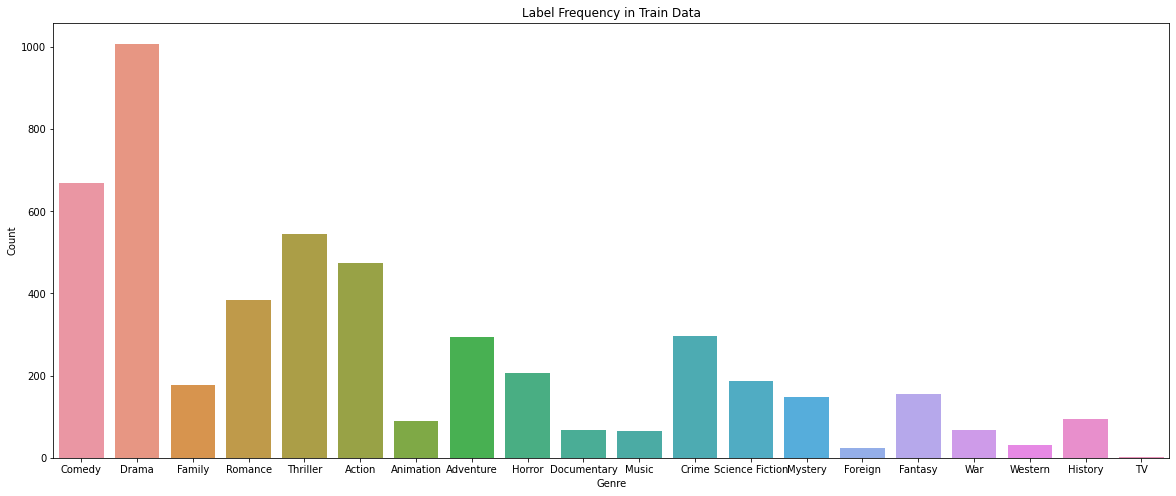

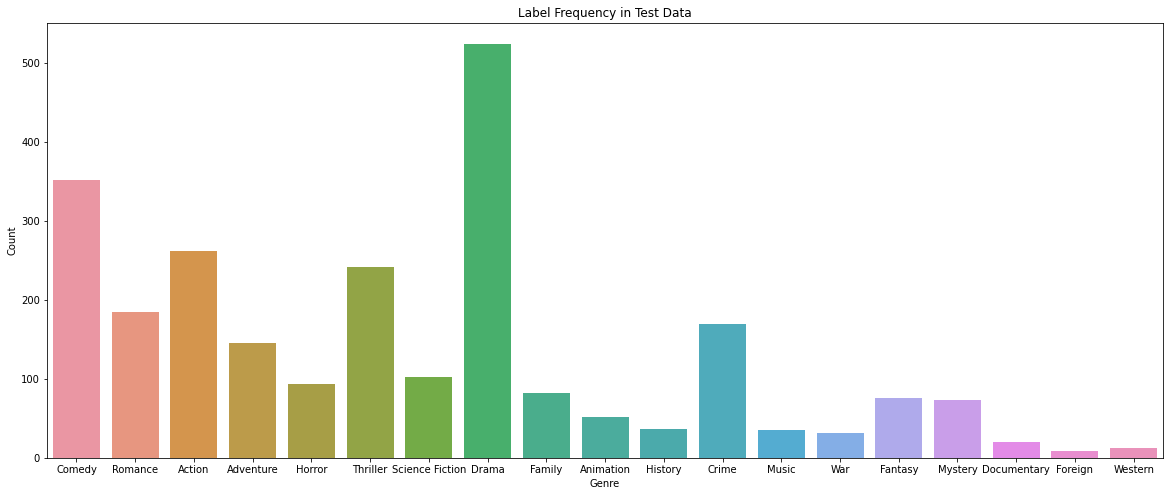

In [ ]:
plt.figure(figsize=(20,8)) 
keys = list(count_id.keys())
vals = [float(count_id[k]) for k in keys]
sns.barplot(x=unique_names, y=vals)
plt.ylabel("Count")
plt.xlabel("Genre")
plt.title("Label Frequency in Train Data")
plt.savefig("./Trainlabels", dpi=300)
plt.figure(figsize=(20,8)) 
keys = list(count_id_test.keys())
vals = [float(count_id_test[k]) for k in keys]
sns.barplot(x=unique_names_test, y=vals)
plt.ylabel("Count")
plt.xlabel("Genre")
plt.title("Label Frequency in Test Data")
plt.savefig("./Testlabels", dpi=300)

In [ ]:
# function for text cleaning 
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text
X_cleaned = []
for x in X:
  X_cleaned.append(clean_text(x))
print("Before Cleaning: ")
print(X[0])
print("------------------------------------")
print("After Cleaning:")
print(X_cleaned[0])

#Test
X_cleaned_test = []
for x in X_test:
  X_cleaned_test.append(clean_text(x))

Before Cleaning: 
When Lou who has become the father of the Internet is shot by an unknown assailant Jacob and Nick fire up the time machine again to save their friend 
------------------------------------
After Cleaning:
when lou who has become the father of the internet is shot by an unknown assailant jacob and nick fire up the time machine again to save their friend


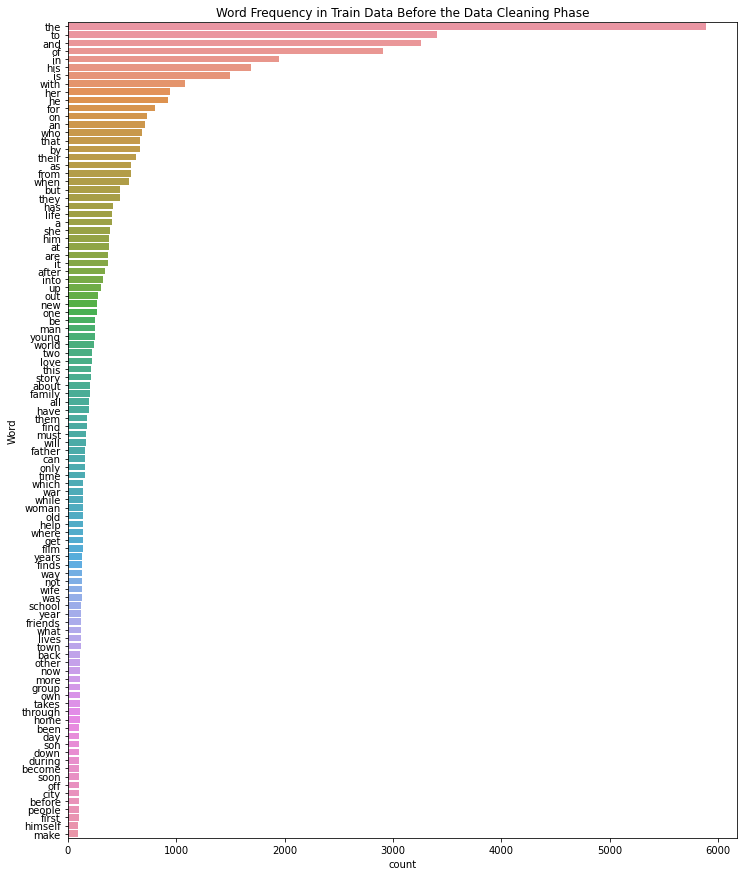

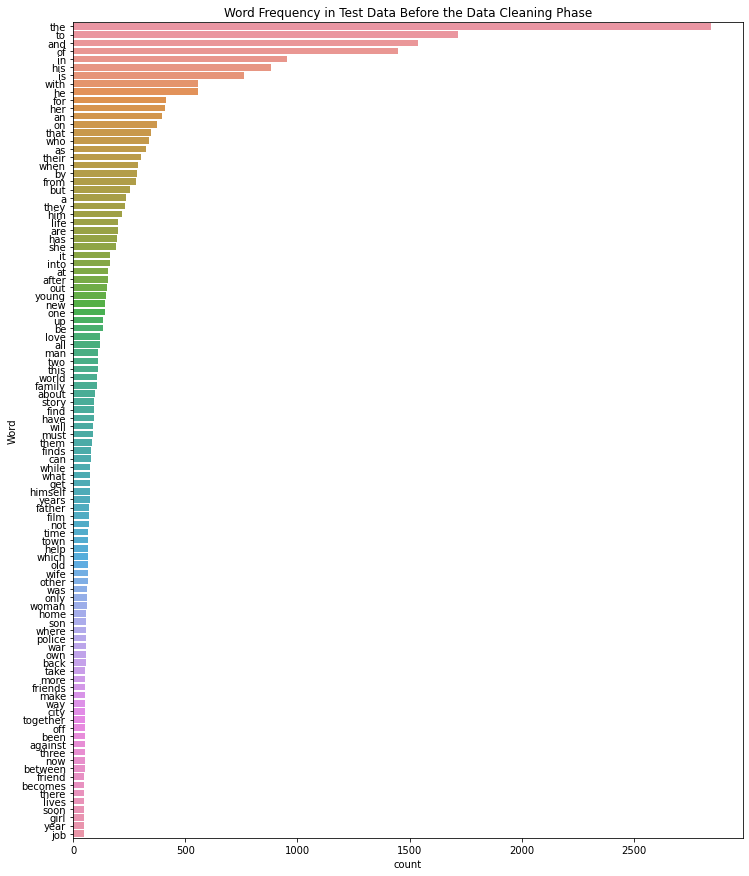

In [ ]:
def freq_words(x,collection_type, isClean, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  if isClean:
    plt.title("Word Frequency in "+collection_type + " Data After the Data Cleaning Phase")
  else:
    plt.title("Word Frequency in "+collection_type + " Data Before the Data Cleaning Phase")    
  plt.savefig(f"./WordFreq_{collection_type}_{isClean}", dpi=300)
  plt.show()
  
# print 100 most frequent words 
freq_words(X_cleaned,"Train", False, 100)
freq_words(X_cleaned_test, "Test", False, 100)

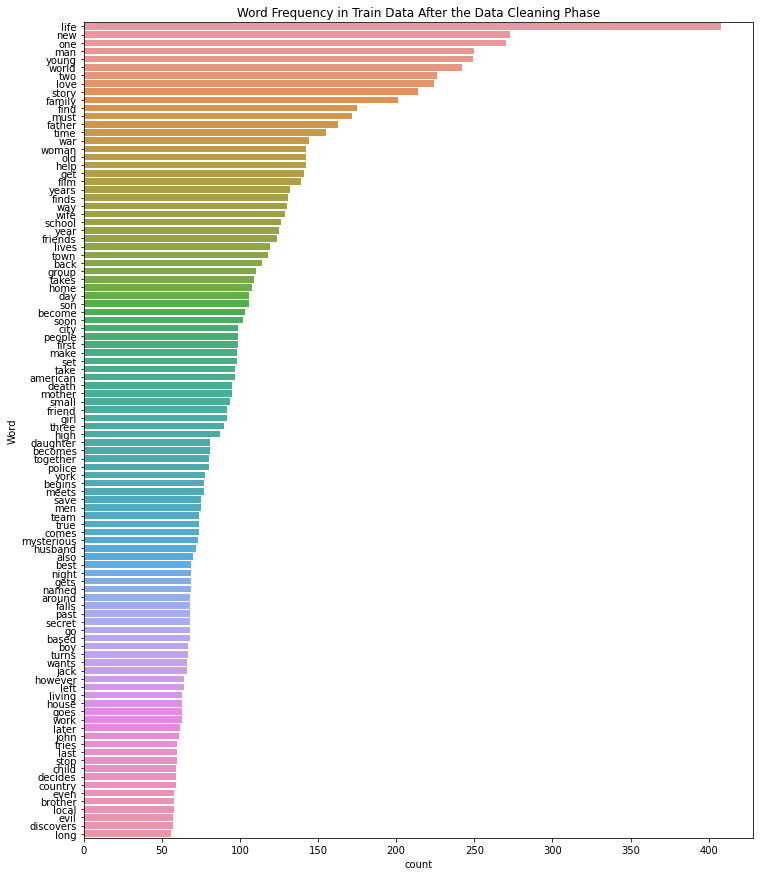

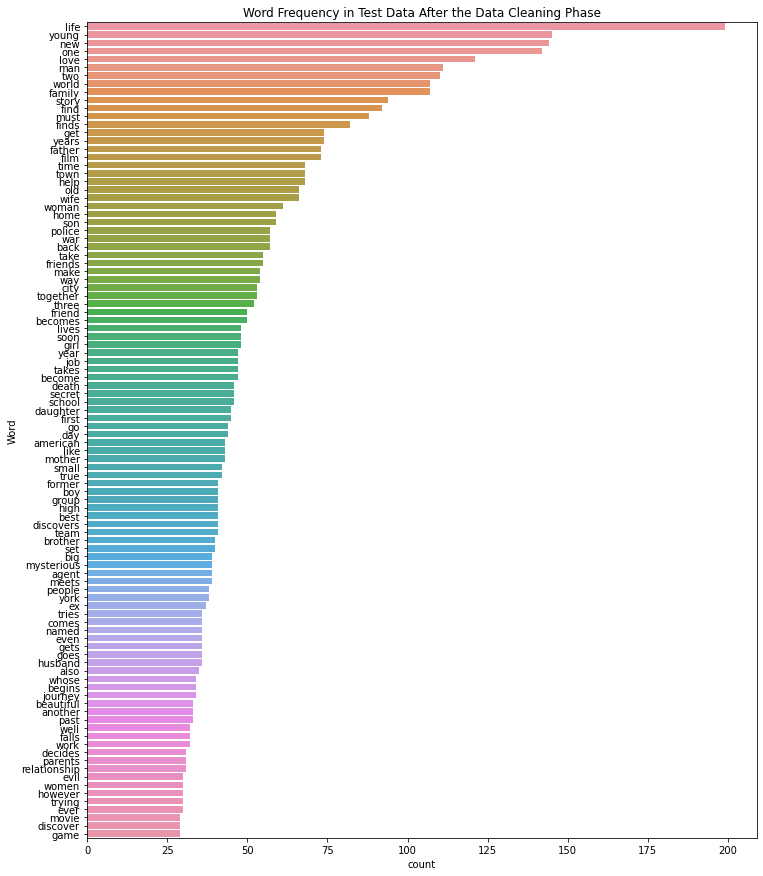

Before Removing: 
when lou who has become the father of the internet is shot by an unknown assailant jacob and nick fire up the time machine again to save their friend
------------------------------------
After Removing:
lou become father internet shot unknown assailant jacob nick fire time machine save friend


In [ ]:
stop_words = set(stopwords.words('english'))

X_cleaned_removed = []
X_cleaned_removed_test = []
# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

for x in X_cleaned:
  X_cleaned_removed.append(remove_stopwords(x))

for x in X_cleaned_test:
  X_cleaned_removed_test.append(remove_stopwords(x))  

freq_words(X_cleaned_removed , "Train", True, 100)
freq_words(X_cleaned_removed_test, "Test", True, 100)
print("Before Removing: ")
print(X_cleaned[0])
print("------------------------------------")
print("After Removing:")
print(X_cleaned_removed[0])

In [ ]:
#Train Test Split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train = X_cleaned_removed
X_test = X_cleaned_removed_test
#y_train = labels

In [ ]:
# print(unique_id)
# print(unique_names)
# print(count_id)
# print(labels)
y_train = np.zeros((len(labels)+len(removed_index), len(unique_id)))   #This Creates 1995*20 Numpy Array
for i in range(len(labels)+ len(removed_index)):
  if i not in removed_index:
    for j in range(len(labels[i])):
      y_train[i][unique_id.index(labels[i][j])] = 1
y_train = np.delete(y_train, removed_index , axis=0)
# print(y_train.shape)
# print(y_train[-1])
# print(y_train)


y_test = np.zeros((len(labels_test)+len(removed_index_test), len(unique_id_test)))   #This Creates 1995*20 Numpy Array
for i in range(len(labels_test)+ len(removed_index_test)):
  if i not in removed_index_test:
    for j in range(len(labels_test[i])):
      y_test[i][unique_id_test.index(labels_test[i][j])] = 1
y_test = np.delete(y_test, removed_index_test, axis=0)

In [ ]:
print(y_train.shape)
print(y_test.shape)
print(len(X_train))
print(len(X_test))

(1995, 20)
(997, 19)
1995
997


In [ ]:
# tokenizer = Tokenizer(num_words=5000)
# tokenizer.fit_on_texts(X_train)

# X_train = tokenizer.texts_to_sequences(X_train)
# # X_test = tokenizer.texts_to_sequences(X_test)

# vocab_size = len(tokenizer.word_index) + 1

# maxlen = 200

# X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)

#Create Representation

##Word2Vec

In [ ]:
!brew install wget

!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
!gzip -d GoogleNews-vectors-negative300.bin.gz


/bin/bash: brew: command not found
--2021-07-05 20:24:23--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.33.110
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.33.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  47.5MB/s    in 35s     

2021-07-05 20:24:58 (44.7 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]

gzip: GoogleNews-vectors-negative300.bin already exists; do you wish to overwrite (y or n)? n
	not overwritten


In [ ]:
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True) 
word_vectors = model.wv

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#For the 157th Corrupted Data
# print(np.argwhere(np.isnan(X_train_rep)))
del X_train[156]
y_train = np.delete(y_train, (156), axis=0)

# print(np.argwhere(np.isnan(X_test_rep)))
del X_test[860]
y_test = np.delete(y_test, (860), axis=0)


In [ ]:
X_train_rep = np.zeros((len(X_train), 300))
for index,x in enumerate(X_train):
  x_cum = np.zeros((1,300))
  for word in x.split():
    if word in word_vectors.vocab:
      x_cum = np.vstack((x_cum, model[word]))
  x_cum = np.delete(x_cum, (0), axis=0)
  X_train_rep[index] = np.mean(x_cum, axis = 0)
print(X_train_rep.shape)


X_test_rep = np.zeros((len(X_test), 300))
for index,x in enumerate(X_test):
  x_cum = np.zeros((1,300))
  for word in x.split():
    if word in word_vectors.vocab:
      x_cum = np.vstack((x_cum, model[word]))
  x_cum = np.delete(x_cum, (0), axis=0)
  X_test_rep[index] = np.mean(x_cum, axis = 0)
print(X_test_rep.shape)

(1994, 300)
(996, 300)


In [ ]:
print(np.any(np.isnan(X_train_rep))) #Should be False
print(np.all(np.isfinite(X_train_rep))) #Should be True

print(np.any(np.isnan(X_test_rep))) #Should be False
np.all(np.isfinite(X_test_rep)) #Should be True

False
True
False


True

In [ ]:
# from sklearn.cluster import DBSCAN
# dbscan = DBSCAN(metric='cosine', eps=0.07, min_samples=3) # you can change these parameters, given just for example 
# cluster_labels = dbscan.fit_predict(X) # where X - is your matrix, where each row corresponds to one document (line) from the docs, you need to cluster 


In [ ]:

# # getting word vectors of a word
# dog = model['dog']

# #performing king queen magic
# print(model.most_similar(positive=['woman', 'king'], negative=['man']))

# #picking odd one out
# print(model.doesnt_match("breakfast cereal dinner lunch".split()))

# #printing similarity index
# print(model.similarity('woman', 'man'))

[('queen', 0.7118192911148071), ('monarch', 0.6189674139022827), ('princess', 0.5902431011199951), ('crown_prince', 0.5499460697174072), ('prince', 0.5377321243286133), ('kings', 0.5236844420433044), ('Queen_Consort', 0.5235945582389832), ('queens', 0.518113374710083), ('sultan', 0.5098593235015869), ('monarchy', 0.5087411999702454)]
cereal
0.76640123


/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


##TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)
# tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=5000)
tfidf_vectorizer.fit(X_train)

X_train_rep = tfidf_vectorizer.transform(X_train)
X_test_rep = tfidf_vectorizer.transform(X_test)

In [ ]:
print(X_test_rep.shape)
X_train_rep.shape

(996, 10000)


(1994, 10000)

##Combination

In [ ]:
!brew install wget

!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
!gzip -d GoogleNews-vectors-negative300.bin.gz


/bin/bash: brew: command not found
--2021-07-04 08:55:10--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.164.237
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.164.237|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  73.8MB/s    in 27s     

2021-07-04 08:55:37 (59.3 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [ ]:
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True) 
word_vectors = model.wv

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#For the 157th Corrupted Data
# print(np.argwhere(np.isnan(X_train_rep)))
# del X_train[156]
# y_train = np.delete(y_train, (156), axis=0)

# print(np.argwhere(np.isnan(X_test_rep)))
# del X_test[860]
# y_test = np.delete(y_test, (860), axis=0)


In [ ]:
data_points_number = 0
for i in range(len(X_train)):
  data_points_number += len(X_train[i].split())
print(data_points_number)


data_points_number_test = 0
for i in range(len(X_test)):
  data_points_number_test += len(X_test[i].split())
data_points_number_test

60276


29997

In [ ]:
#Create Vector for every word for clustring algorithms
#Train
data_points = np.zeros(((data_points_number), 300))
data_points_label = []
idx = 0
for index,x in enumerate(X_train):
  for word in x.split():
    if (word in word_vectors.vocab )and (word not in data_points_label):
      data_points[idx] = model[word]
      data_points_label.append(word)
      idx = idx + 1
print(data_points.shape)
print(len(data_points_label))
data_points = data_points[:idx]
print(data_points.shape)

#Test
data_points_test = np.zeros(((data_points_number_test), 300))
data_points_label_test = []
idx = 0
for index,x in enumerate(X_test):
  for word in x.split():
    if word in word_vectors.vocab:
      data_points_test[idx] = model[word]
      data_points_label_test.append(word)
      idx = idx + 1
print(data_points_test.shape)
print(len(data_points_label_test))
data_points_test = data_points_test[:idx]
print(data_points_test.shape)



(60276, 300)
11940
(11940, 300)
(29997, 300)
28731
(28731, 300)


In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(metric='cosine', eps=0.35, min_samples=5) # you can change these parameters, given just for example 
cluster_labels = dbscan.fit_predict(data_points) # where X - is your matrix, where each row corresponds to one document (line) from the docs, you need to cluster 


In [ ]:
# from nltk.cluster import KMeansClusterer
# import nltk
# NUM_CLUSTERS=1000
# kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=1)
# assigned_clusters = kclusterer.cluster(data_points, assign_clusters=True)
# #2 min for each repeats

In [ ]:
# cluster_labels = np.asarray(assigned_clusters)

In [ ]:
len(assigned_clusters)

11940

In [ ]:
# def display_closestwords_tsnescatterplot(model, word, size):
    
#     arr = np.empty((0,size), dtype='f')
#     word_labels = [word]close_words = model.similar_by_word(word)arr = np.append(arr, np.array([model[word]]), axis=0)
#     for wrd_score in close_words:
#         wrd_vector = model[wrd_score[0]]
#         word_labels.append(wrd_score[0])
#         arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
#     tsne = TSNE(n_components=2, random_state=0)
#     np.set_printoptions(suppress=True)
#     Y = tsne.fit_transform(arr)x_coords = Y[:, 0]
#     y_coords = Y[:, 1]
#     plt.scatter(x_coords, y_coords)for label, x, y in zip(word_labels, x_coords, y_coords):
#         plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
#     plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
#     plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
#     plt.show()>>> display_closestwords_tsnescatterplot(model, 'Porsche 718 Cayman', 50) 

In [ ]:
print(cluster_labels)

[998 692  50 ... 559 491 888]


In [ ]:
idx_s = np.where(cluster_labels==3)[0]
for i in range(20):
  print(data_points_label[idx_s[i]])
# print(cluster_labels[:10])

drummer
musicians
band
artist
musician
singer
songwriter
bands
vocalist
entertainer
artists
bandmate
songwriters
singers
bassist


IndexError: ignored

In [ ]:
cluster_labels[:20]
print(data_points_label[2])
print(data_points_label[13])

father
friend


In [ ]:
unique, counts = np.unique(cluster_labels, return_counts=True)
print(np.asarray((unique, counts)).T)
print(cluster_labels.shape)

[[   -1 10221]
 [    0    79]
 [    1   607]
 [    2     6]
 [    3    15]
 [    4     5]
 [    5    34]
 [    6    12]
 [    7     9]
 [    8     5]
 [    9     6]
 [   10    21]
 [   11    10]
 [   12     5]
 [   13     5]
 [   14     6]
 [   15     6]
 [   16    17]
 [   17    38]
 [   18     6]
 [   19     6]
 [   20     8]
 [   21     7]
 [   22    94]
 [   23     5]
 [   24     9]
 [   25    11]
 [   26    36]
 [   27    10]
 [   28     8]
 [   29    16]
 [   30     6]
 [   31    16]
 [   32     5]
 [   33    23]
 [   34     6]
 [   35     7]
 [   36     8]
 [   37     5]
 [   38    22]
 [   39     8]
 [   40    13]
 [   41    14]
 [   42    16]
 [   43    11]
 [   44     6]
 [   45     5]
 [   46     9]
 [   47     8]
 [   48     4]
 [   49     6]
 [   50     6]
 [   51     8]
 [   52     8]
 [   53    11]
 [   54    14]
 [   55     7]
 [   56     5]
 [   57     9]
 [   58     9]
 [   59     5]
 [   60     3]
 [   61     6]
 [   62     5]
 [   63    12]
 [   64     5]
 [   65   

In [ ]:
np.max(cluster_labels)

117

In [ ]:
X_train[0]

'lou become father internet shot unknown assailant jacob nick fire time machine save friend'

In [ ]:
#Train
all_words = 0
existing_words = 0
synonums_dict = {}
X_train_combination = []
for index,x in enumerate(X_train):
  row = []
  for word in x.split():
    all_words+= 1 
    if word in word_vectors.vocab: 
      idx = data_points_label.index(word)
      if cluster_labels[idx]==-1:   #If it was considered noise in clustering algorithm
          row.append(word)
      elif cluster_labels[idx] not in synonums_dict:
          existing_words+= 1
          synonums_dict[cluster_labels[idx]] = data_points_label[idx]
          row.append(word)
      else:
          existing_words+= 1
          row.append(synonums_dict[cluster_labels[idx]])
    else:
      row.append(word)
  frow = " ".join(str(temp) for temp in row)
  X_train_combination.append(frow)
  


print(len(X_train))
print(len(X_train_combination))
print(X_train[0])
print(X_train_combination[0])
print("%f Percent was present in dictionery for Train data. " %(existing_words/all_words))

#Test
all_words = 0
existing_words = 0
X_test_combination = []
for index,x in enumerate(X_test):
  row = []
  for word in x.split():
    all_words += 1 
    if (word in word_vectors.vocab) and (word in data_points_label):
      existing_words += 1  
      idx = data_points_label.index(word)
      if cluster_labels[idx]!= -1:
        row.append(synonums_dict[cluster_labels[idx]])
      else:
        row.append(word)
    else:
      row.append(word)
  frow = " ".join(str(temp) for temp in row)
  X_test_combination.append(frow)

print("%f Percent was present in dictionery for Test data. " %(existing_words/all_words))
print(len(X_test))
print(len(X_test_combination))
print(X_test[0])
print(X_test_combination[0])

1994
1994
lou become father internet shot unknown assailant jacob nick fire time machine save friend
lou become father internet shot unknown assailant jacob nick fire time machine save father
0.213800 Percent was present in dictionery for Train data. 
0.855986 Percent was present in dictionery for Test data. 
996
996
andy schmidt last year college taking life easy always saucy joke lips manages win fellow student mary heart although already otherwise engaged getting job college turns much harder expected directors take offense free interpretation roles desperate tries wrestling avoid getting beaten stages fights incidentally invents show wrestling
jacob schmidt last months college taking life easy always saucy joke lips manages winning fellow students jacob heart although already otherwise engaged getting job college turns much impossible expected directors take offense free interpretation roles desperate tries wrestling prevent getting beaten stages fights incidentally invents show wr

In [ ]:
a = -10
print(X_train[a])
print(X_train_combination[a])
print(len(y_train))

print(X_test[a])
print(X_test_combination[a])
print(len(y_train))

legend creepy masked man michael myers comes life fourth installment successful horror franchise time michael niece jamie seem escape crazy uncle michael loose jamie enlists help good old dr loomis stop murderer time though seems end michael madness
famous comedy masked father jacob jacob comes life third installment successful horror franchise time jacob father jacob seem escape comedy father jacob loose jacob enlists help bad old dr loomis stop dead time though seem end jacob madness
1994
two clueless georgia homegirls big hearts even bigger hair find happiness fame thrills swank hills beverly anything possible revive blakemore interest life teaches black american princesses return
seven clueless jacob homegirls bad hearts even bigger hair find happiness fame thrills swank hills beverly everyone possible revive blakemore interest life teaches black jacob princesses return
1994


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)
tfidf_vectorizer.fit(X_train_combination)

X_train_rep = tfidf_vectorizer.transform(X_train_combination)
X_test_rep = tfidf_vectorizer.transform(X_test_combination)

In [ ]:
print(X_test_rep.shape)
X_train_rep.shape

(996, 10000)


(1994, 10000)

#Create Classifier

##Classifier 1

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),])
for i,category in enumerate(unique_names):
    print('**Processing {} Genre...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(X_train_rep, y_train[:,i])
    
    # calculating test accuracy
    # prediction = LogReg_pipeline.predict(x_test)
    # print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    # print("\n")


**Processing Comedy Genre...**
**Processing Drama Genre...**
**Processing Family Genre...**
**Processing Romance Genre...**
**Processing Thriller Genre...**
**Processing Action Genre...**
**Processing Animation Genre...**
**Processing Adventure Genre...**
**Processing Horror Genre...**
**Processing Documentary Genre...**
**Processing Music Genre...**
**Processing Crime Genre...**
**Processing Science Fiction Genre...**
**Processing Mystery Genre...**
**Processing Foreign Genre...**
**Processing Fantasy Genre...**
**Processing War Genre...**
**Processing Western Genre...**
**Processing History Genre...**
**Processing TV Genre...**


In [ ]:
from sklearn.metrics import accuracy_score
accuracies = {}
for i,category in enumerate(unique_names_test):
    # print('**Evaluating {} Genre...**'.format(category))
    
    # Training logistic regression model on train data
    y_pred = LogReg_pipeline.predict(X_test_rep)
    accuracies[category] = accuracy_score(y_test[:,i],y_pred)

for item in accuracies:
  print(item)
  print(accuracies[item])
#   print("Accuracy on Genre "+ item[0]+": "+ (item[1]))
print("------------------------------------------------------------")  
print("Total Accuracy is: "+ str(sum(accuracies.values())/len(accuracies)))

Comedy
0.6465863453815262
Romance
0.8142570281124498
Action
0.7349397590361446
Adventure
0.8544176706827309
Horror
0.9056224899598394
Thriller
0.7550200803212851
Science Fiction
0.8975903614457831
Drama
0.4748995983935743
Family
0.9176706827309237
Animation
0.9477911646586346
History
0.963855421686747
Crime
0.8293172690763052
Music
0.964859437751004
War
0.9688755020080321
Fantasy
0.9236947791164659
Mystery
0.9246987951807228
Documentary
0.9799196787148594
Foreign
0.9919678714859438
Western
0.9869477911646586
------------------------------------------------------------
Total Accuracy is: 0.8675227224688227


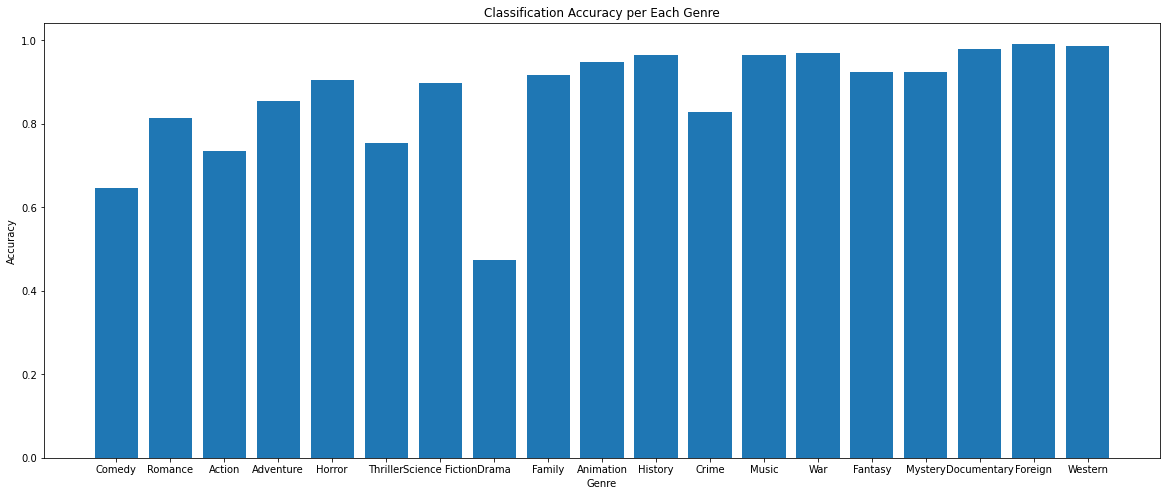

In [ ]:
plt.figure(figsize=(20,8)) 
plt.bar(*zip(*accuracies.items()))
plt.ylabel("Accuracy")
plt.xlabel("Genre")
plt.title("Classification Accuracy per Each Genre")
plt.savefig("Word2Vec_Results_LogReg", dpi=300)
# plt.show()


##Classifier 2

In [ ]:
!pip install scikit-multilearn

     |████████████████████████████████| 92kB 5.9MB/s 


In [ ]:
# using binary relevance
from sklearn.metrics import accuracy_score
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())# train
classifier.fit(X_train_rep, y_train)# predict


BinaryRelevance(classifier=GaussianNB(priors=None, var_smoothing=1e-09),
                require_dense=[True, True])

In [ ]:
predictions = classifier.predict(X_test_rep)# accuracy
a = np.hstack((y_test, np.zeros((y_test.shape[0], 1 ))  ))
# print("Accuracy = ",accuracy_score(a,predictions.toarray()))
correct = 0
for pred,true in zip(predictions, a):
  for j in range(20):
    if pred[0,j]==true[j]:
     correct+=1
print(correct/(y_test.shape[0]*y_test.shape[1]))

0.8892411752272247


#Classifier 3


In [ ]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression# initialize classifier chains multi-label classifier
classifier = ClassifierChain(LogisticRegression())# Training logistic regression model on train data
classifier.fit(X_train_rep, y_train)# predict

ClassifierChain(classifier=LogisticRegression(C=1.0, class_weight=None,
                                              dual=False, fit_intercept=True,
                                              intercept_scaling=1,
                                              l1_ratio=None, max_iter=100,
                                              multi_class='auto', n_jobs=None,
                                              penalty='l2', random_state=None,
                                              solver='lbfgs', tol=0.0001,
                                              verbose=0, warm_start=False),
                order=None, require_dense=[True, True])

In [ ]:
predictions = classifier.predict(X_test_rep)# accuracy
a = np.hstack((y_test, np.zeros((y_test.shape[0], 1 ))  ))
# print("Accuracy = ",accuracy_score(a,predictions.toarray()))
correct = 0
for pred,true in zip(predictions, a):
  for j in range(20):
    if pred[0,j]==true[j]:
     correct+=1
print(correct/(y_test.shape[0]*y_test.shape[1]))

0.8930458676812513


#Classifier 4


In [ ]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset# initialize label powerset multi-label classifier
classifier = LabelPowerset(LogisticRegression())# train
classifier.fit(X_train_rep, y_train)# predict

LabelPowerset(classifier=LogisticRegression(C=1.0, class_weight=None,
                                            dual=False, fit_intercept=True,
                                            intercept_scaling=1, l1_ratio=None,
                                            max_iter=100, multi_class='auto',
                                            n_jobs=None, penalty='l2',
                                            random_state=None, solver='lbfgs',
                                            tol=0.0001, verbose=0,
                                            warm_start=False),
              require_dense=[True, True])

In [ ]:
predictions = classifier.predict(X_test_rep)# accuracy
a = np.hstack((y_test, np.zeros((y_test.shape[0], 1 ))  ))
# print("Accuracy = ",accuracy_score(a,predictions.toarray()))
correct = 0
for pred,true in zip(predictions, a):
  for j in range(20):
    if pred[0,j]==true[j]:
     correct+=1
print(correct/(y_test.shape[0]*y_test.shape[1]))

0.8899809765377299


#Classifier 5

In [ ]:
from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix
classifier_new = MLkNN(k=10)

x_train = lil_matrix(X_train_rep).toarray()
y_train = lil_matrix(y_train).toarray()
x_test = lil_matrix(X_test_rep).toarray()

classifier_new.fit(X_train_rep, y_train)# predict


MLkNN(ignore_first_neighbours=0, k=10, s=1.0)

In [ ]:
predictions = classifier_new.predict(X_test_rep)# accuracy
a = np.hstack((y_test, np.zeros((y_test.shape[0], 1 ))  ))
print("Accuracy = ",accuracy_score(a,predictions.toarray()))
correct = 0
correct2 = 0
for pred,true in zip(predictions, a):
  cnt = 0
  for j in range(20):
    if pred[0,j]==true[j]:
     correct+=1
     cnt += 1 

  if cnt ==20:
    correct2+=1


print(correct/(y_test.shape[0]*y_test.shape[1]))
print(correct2/(y_test.shape[0]))    
# print(correct/(y_test.shape[0]*y_test.shape[1]))

Accuracy =  0.025100401606425703
0.889135489325724
0.025100401606425703


#Classifier 6: DNN

In [ ]:
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate

In [ ]:
deep_inputs = Input(shape=(X_train_rep.shape[1],))
# x = Dense(256, activation='relu')(deep_inputs)
# x = Dense(128, activation='relu')(deep_inputs)
output = Dense(20, activation='sigmoid')(deep_inputs)
nn_model = Model(inputs=deep_inputs, outputs=output, name = "model_5")
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

print(nn_model.summary())

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 300)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                6020      
Total params: 6,020
Trainable params: 6,020
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# history = nn_model.fit(X_train_rep.toarray(), y_train, batch_size=128, epochs=100)
history = nn_model.fit(X_train_rep, y_train, batch_size=128, epochs=100)

Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.6754 - acc: 0.0489
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6102 - acc: 0.3438
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5561 - acc: 0.3730
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5105 - acc: 0.3792
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.4753 - acc: 0.4162
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.4443 - acc: 0.3816
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.4233 - acc: 0.3648
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.4020 - acc: 0.4198
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.3856 - acc: 0.3962
Epoch 10/100
16/16 [==============================] - 0s 2ms/step - loss: 0.3721 - acc: 0.3946
Epoch 11/100
16/16 [==============================] - 0s 2m

In [ ]:

predictions = nn_model.predict(X_test_rep)
# predictions = nn_model.predict(X_test_rep)


a = np.hstack((y_test, np.zeros((y_test.shape[0], 1 ))  ))
# print("Accuracy = ",accuracy_score(a,predictions.toarray()))
correct = 0
results_dict = {}
for j in range(20):
  results_dict[j] = 0

correct2 = 0

for pred,true in zip(predictions, a):
  temp = np.zeros((20))
  for j in range(20):
    if pred[j]>=0.5:
      temp[j] = 1
    else:
      temp[j] = 0
    
    if temp[j]==true[j]:
     correct+=1
     results_dict[j] = results_dict[j] + 1
  # print(temp)
  if np.array_equal(temp,true):
    correct2 += 1


print(correct/(y_test.shape[0]*y_test.shape[1]))
print(correct2/(y_test.shape[0]))


score = nn_model.evaluate(X_test_rep, a)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

# for j in range(20):
#   print(results_dict[j]/y_test.shape[0])

0.906573663073346
0.030120481927710843
32/32 [==============================] - 0s 2ms/step - loss: 0.3699 - acc: 0.2490
Test Score: 0.36986243724823
Test Accuracy: 0.24899598956108093


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
preds = np.zeros(predictions.shape)
for index,true in enumerate(predictions):
  for j in range(20):
    if true[j]>0.5:
      preds[index][j] = 1
    else:
      preds[index][j] = 0

from sklearn.metrics import accuracy_score
print(accuracy_score(preds , a))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.030120481927710843


#Classifier 7: SVM


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.multioutput import MultiOutputClassifier

In [ ]:
svm = LinearSVC(random_state=42)
multilabel_classifier = MultiOutputClassifier(svm, n_jobs=-1)
multilabel_classifier = multilabel_classifier.fit(X_train_rep, y_train)


In [ ]:

predictions = multilabel_classifier.predict(X_test_rep)

a = np.hstack((y_test, np.zeros((y_test.shape[0], 1 ))  ))
# print("Accuracy = ",accuracy_score(a,predictions.toarray()))
correct = 0
correct_2 = 0
for pred,true in zip(predictions, a):
  for j in range(20):
    if pred[j]==true[j]:
     correct+=1
     
    if np.array_equal(pred,true):
      correct_2 += 1


print(correct/(y_test.shape[0]*y_test.shape[1]))
print(correct_2/(y_test.shape[0]))



# for j in range(20):
#   print("%f" % (results_dict[j]/y_test.shape[0]))

0.8962692876770239
0.40160642570281124
